In [9]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Valores_Nulos.csv') 

data.head(2)

,Unnamed: 0,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_url,host_name,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,0,20250619031327,2025-06-19,city scrape,Milano Central Luxury - 3 BDR / 7 Guests,"A stylish and cozy apartment, beautifully furn...","The Central Luxury apartment, is located just ...",2718914,https://www.airbnb.com/users/show/2718914,Nicola,...,2025-05-20,4.82,4.90,4.89,4.89,4.76,4.71,IT015146B4CCMWJAB7,27,0.91
1,1,20250619031327,2025-06-19,city scrape,Porta Vigentina Triplex in City Center,The apartment is in a beautiful 18C building a...,No description available,380378,https://www.airbnb.com/users/show/380378,Andrea,...,2024-04-21,4.67,4.89,5.00,5.00,4.89,4.33,Not included,1,0.06


In [11]:
data1 = data.drop(columns=["Unnamed: 0"])
data1.head(2)

,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_url,host_name,host_since,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,20250619031327,2025-06-19,city scrape,Milano Central Luxury - 3 BDR / 7 Guests,"A stylish and cozy apartment, beautifully furn...","The Central Luxury apartment, is located just ...",2718914,https://www.airbnb.com/users/show/2718914,Nicola,2012-06-23,...,2025-05-20,4.82,4.90,4.89,4.89,4.76,4.71,IT015146B4CCMWJAB7,27,0.91
1,20250619031327,2025-06-19,city scrape,Porta Vigentina Triplex in City Center,The apartment is in a beautiful 18C building a...,No description available,380378,https://www.airbnb.com/users/show/380378,Andrea,2011-02-07,...,2024-04-21,4.67,4.89,5.00,5.00,4.89,4.33,Not included,1,0.06


In [18]:
#Identificar valores nulos por columna
valores_nulos=data1.isnull().sum()
pd.set_option("display.max_rows", None)       # Todas las filas
valores_nulos

scrape_id                         0
last_scraped                      0
source                            0
name                              0
description                       0
neighborhood_overview             0
host_id                           0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_about                        0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_listings_count               0
host_total_listings_count         0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
bathrooms                         0
beds                              0
price                       

In [19]:
cuantitativas= data1.select_dtypes(include=["number"])
cualitativas = data1.select_dtypes(include=["object", "category"])

<Figure size 1500x800 with 0 Axes>

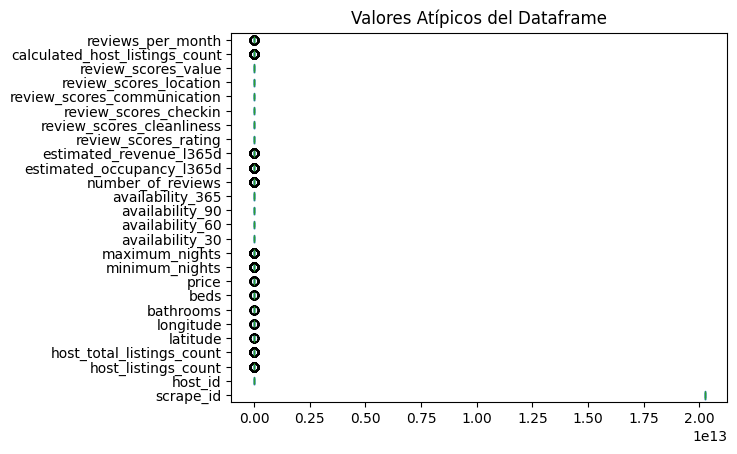

In [20]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [21]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido scrape_id                         2.025062e+13
host_id                           9.122088e+08
host_listings_count               2.407979e+02
host_total_listings_count         4.544187e+02
latitude                          4.552089e+01
longitude                         9.260303e+00
bathrooms                         4.176673e+00
beds                              8.222687e+00
price                             1.145816e+03
minimum_nights                    6.873836e+01
maximum_nights                    1.614702e+03
availability_30                   4.786453e+01
availability_60                   9.559530e+01
availability_90                   1.413827e+02
availability_365                  5.335426e+02
number_of_reviews                 2.098432e+02
estimated_occupancy_l365d         2.778975e+02
estimated_revenue_l365d           1.474651e+05
review_scores_rating              9.794806e+00
review_scores_cleanliness         9.850629e+00
review_scores_checkin             

In [23]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3.head(1)

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,beds,price,minimum_nights,...,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,20250619031327,2718914,28.0,64.0,45.48309,9.20435,2.0,4.0,371.0,4.0,...,136,50456.0,4.82,4.9,4.89,4.89,4.76,4.71,27.0,0.91


In [24]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos

scrape_id                          0
host_id                            0
host_listings_count               29
host_total_listings_count         31
latitude                           7
longitude                         21
bathrooms                         15
beds                              19
price                              0
minimum_nights                     4
maximum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                 27
estimated_occupancy_l365d          0
estimated_revenue_l365d           32
review_scores_rating               0
review_scores_cleanliness          0
review_scores_checkin              0
review_scores_communication        0
review_scores_location             0
review_scores_value                0
calculated_host_listings_count    28
reviews_per_month                 26
dtype: int64

In [25]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean.head(1)

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,beds,price,minimum_nights,...,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,20250619031327,2718914,28.0,64.0,45.48309,9.20435,2.0,4.0,371.0,4.0,...,136,50456.0,4.82,4.9,4.89,4.89,4.76,4.71,27.0,0.91


In [26]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

scrape_id                         0
host_id                           0
host_listings_count               0
host_total_listings_count         0
latitude                          0
longitude                         0
bathrooms                         0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
estimated_occupancy_l365d         0
estimated_revenue_l365d           0
review_scores_rating              0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_count    0
reviews_per_month                 0
dtype: int64

In [27]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                         2.025062e+13
host_id                           1.115173e+09
host_listings_count               7.100000e+01
host_total_listings_count         9.700000e+01
latitude                          4.551225e+01
longitude                         9.243392e+00
bathrooms                         3.500000e+00
beds                              6.000000e+00
price                             9.866250e+02
minimum_nights                    8.500000e+00
maximum_nights                    8.660000e+02
availability_30                   6.100000e+01
availability_60                   1.095000e+02
availability_90                   1.520000e+02
availability_365                  5.470000e+02
number_of_reviews                 6.437500e+01
estimated_occupancy_l365d         1.550000e+02
estimated_revenue_l365d           7.812000e+04
review_scores_rating              1.240000e+01
review_scores_cleanliness         1.250000e+01
review_scores_checkin             

In [28]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr.head(1)

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,beds,price,minimum_nights,...,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,20250619031327,2718914,28.0,64.0,45.48309,9.20435,2.0,4.0,371.0,4.0,...,136.0,50456.0,4.82,4.9,4.89,4.89,4.76,4.71,27.0,0.91


In [29]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

scrape_id                           0
host_id                             0
host_listings_count               172
host_total_listings_count         172
latitude                           26
longitude                          58
bathrooms                          35
beds                               47
price                              73
minimum_nights                    305
maximum_nights                    299
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_reviews                 175
estimated_occupancy_l365d         179
estimated_revenue_l365d           145
review_scores_rating                0
review_scores_cleanliness           0
review_scores_checkin               0
review_scores_communication         0
review_scores_location              0
review_scores_value                 0
calculated_host_listings_count    177
reviews_per_month                 107
dtype: int64

In [30]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.median(),1))
data4_iqr.head(1)

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,beds,price,minimum_nights,...,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,20250619031327,2718914,28.0,64.0,45.48309,9.20435,2.0,4.0,371.0,4.0,...,136.0,50456.0,4.82,4.9,4.89,4.89,4.76,4.71,27.0,0.91


In [31]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios.head(1)

,last_scraped,source,name,description,neighborhood_overview,host_url,host_name,host_since,host_location,host_about,...,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2025-06-19,city scrape,Milano Central Luxury - 3 BDR / 7 Guests,"A stylish and cozy apartment, beautifully furn...","The Central Luxury apartment, is located just ...",https://www.airbnb.com/users/show/2718914,Nicola,2012-06-23,"Monza, Italy","I love traveling , experiencing always new thi...",...,136.0,50456.0,4.82,4.9,4.89,4.89,4.76,4.71,27.0,0.91


In [32]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

last_scraped                      0
source                            0
name                              0
description                       0
neighborhood_overview             0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_about                        0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
has_availability                  0
calendar_last_scraped             0
first_review                      0
last_review                       0
license                           0
scrape_id                         0
host_id                           0
host_listings_count               0
host_total_listings_count   

In [33]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Valores_Atipicos.csv")